<a href="https://colab.research.google.com/github/lanymo/comsil_5_github/blob/master/LAB2_0_PyTorch_and_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab2 Pytorch and Deep Learning
## Deep Learning Frameworks
<img src="https://www.researchgate.net/publication/349108714/figure/fig1/AS:988814684217344@1612763200002/Timeline-of-deep-learning-frameworks.png" width=500>


## Pytorch를 이용한 Deep learning Model 순서
- Data processing
- Creating Model
- Optimizing the Model Parameters
- Saving Models
- Loading Model




5초 * Sampling rate -> data 무거움

## 1. Importing PyTorch and other libraries
 - PyTorch와 기타 라이브러리 임포트
   - PyTorch: 딥러닝을 위한 주요 라이브러리로, 신경망 모듈, 최적화 알고리즘 포함
   - NumPy: 수치 연산에 사용
   - Matplotlib: 데이터 시각화에 사용
 - torch.manual_seed(2) 사용하여 재현성을 위한 랜덤 시드 설정




In [3]:
import torch                      # Importing the main PyTorch library
import torch.nn as nn             # Importing the neural network module from PyTorch
import torch.nn.functional as F   # Importing functional interface for neural networks
import torch.optim as optim       # Importing optimization algorithms from PyTorch
import numpy as np                # Importing NumPy for numerical operations
from torch.utils.data import Dataset,DataLoader  # Importing Dataset and DataLoader for data handling
import matplotlib.pyplot as plt   # Importing Matplotlib for plotting
%matplotlib inline
torch.manual_seed(2)              # Setting the random seed for reproducibility

## 2. Data Processing
- XOR Problem
    - X = [0, 0], [0, 1], [1, 0], [1, 1]
    - Y = [0, 1, 1, 0]
- torch: PyTorch의 핵심 라이브러리로, 텐서(tensor) 연산을 포함한 다양한 기능을 제공
- tensor: 다차원 배열로, NumPy의 ndarray와 유사하지만 GPU를 이용한 연산을 지원


In [4]:
X = torch.Tensor([[0,0],[0,1], [1,0], [1,1]])
Y = torch.Tensor([0,1,1,0]).view(-1,1)

In [5]:
print("X")
print(X.shape)
print(X)
print()
print("Y")
print(Y.shape)
print(Y)

X
torch.Size([4, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])

Y
torch.Size([4, 1])
tensor([[0.],
        [1.],
        [1.],
        [0.]])


## 2.1 데이터 시각화
- 데이터를 시각화하여 데이터의 분포와 클래스 분포를 확인
- `plt.scatter`: 산점도를 그리는 함수
    - `X[:,0]`: 첫 번째 열의 데이터
    - `X[:,1]`: 두 번째 열의 데이터
    - `c`: 각 점의 색상을 결정하는 인자
    - `s`: 각 점의 크기를 결정하는 인자
    - `edgecolors`: 각 점의 테두리 색상을 결정하는 인자
- `plt.xticks`: x축 눈금 설정
- `plt.yticks`: y축 눈금 설정
- `plt.legend`: 범례 추가
- `plt.title`: 그래프 제목 추가
- `plt.show`: 그래프 표시

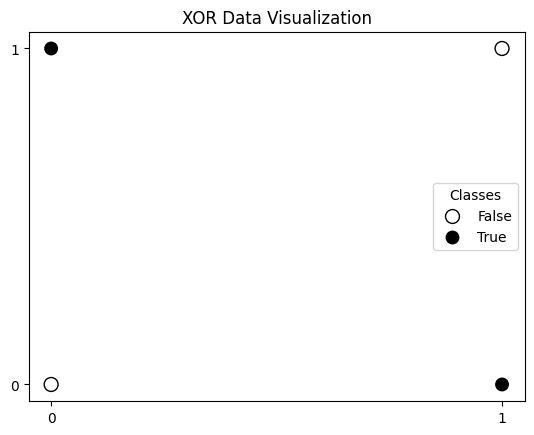

In [6]:
plt.title("XOR Data Visualization")  # Adding a title to the plot
colors = ['white' if label == 0 else 'black' for label in Y]  # Assigning colors based on labels
edgecolors = ['black' if label == 0 else 'none' for label in Y]  # Assigning edge colors based on labels
scatter = plt.scatter(X[:,0], X[:,1], c=colors, s=100, edgecolors=edgecolors)  # Creating scatter plot
plt.xticks([0, 1])  # Setting x-ticks
plt.yticks([0, 1])  # Setting y-ticks
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='white', markersize=10, markeredgecolor='black'),  # Creating legend entry for class 0
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, markeredgecolor='none')],  # Creating legend entry for class 1
           labels=['False', 'True'], title="Classes")  # Setting legend labels and title
plt.show()  # Displaying the plot


## 2.2 Pytorch DataSet
### PyTorch DataSet
- PyTorch의 `torch.utils.data.Dataset` 클래스는 데이터셋을 나타내는 추상 클래스
- 사용자 정의 데이터셋은 이 클래스를 상속받아야 함
- `__len__()` 메서드는 데이터셋의 크기를 반환
    - 예를 들어, `return len(self.X)`와 같이 구현하여 데이터셋의 총 샘플 수를 반환할 수 있습니다.
- `__getitem__()` 메서드는 주어진 인덱스에 해당하는 데이터를 반환
    - 예를 들어, `return self.X[idx], self.Y[idx]`와 같이 구현하여 주어진 인덱스에 해당하는 데이터를 반환
    - 각 데이터는 튜플 형태로 반환되며, 이 튜플은 모델에 전달되어 학습 또는 추론에 사용


In [7]:
class XOR_Dataset(Dataset):
    def __init__(self):
        self.X = torch.Tensor([[0,0],[0,1], [1,0], [1,1]])
        self.Y = torch.Tensor([0,1,1,0]).view(-1,1)  # Reshaping Y to be a column vector with shape (4, 1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

# Create an instance of the dataset
xor_dataset = XOR_Dataset()

# Display the length of the dataset
print("Length of XOR Dataset:", len(xor_dataset))

# Display the first data point
print("First data point (X, Y):", xor_dataset[0])


Length of XOR Dataset: 4
First data point (X, Y): (tensor([0., 0.]), tensor([0.]))


## 2.3 Pytorch DataLoader
### PyTorch DataLoader
- PyTorch의 `torch.utils.data.DataLoader` 클래스는 데이터셋을 배치 단위로 나누어 모델에 공급하는 역할을 함
- `DataLoader`는 데이터셋을 섞거나(shuffle), 여러 프로세스를 사용하여 데이터를 병렬로 로드할 수 있음
- 주요 인자:
    - `dataset`: 로드할 데이터셋
    - `batch_size`: 각 배치의 크기
    - `shuffle`: 데이터를 섞을지 여부 (기본값: False)
    - `num_workers`: 데이터를 로드할 때 사용할 서브 프로세스의 수 (기본값: 0)
- 예를 들어, `DataLoader(xor_dataset, batch_size=2, shuffle=True)`와 같이 사용하여 XOR 데이터셋을 배치 크기 2로 섞어서 로드할 수 있음


In [8]:
# Create a DataLoader for the XOR dataset
xor_dataloader = DataLoader(xor_dataset, batch_size=2, shuffle=True)

# Display the batches
for batch_idx, (data, target) in enumerate(xor_dataloader):
    print(f"Batch {batch_idx+1}:")
    print("Data:", data)
    print("Target:", target)

Batch 1:
Data: tensor([[1., 0.],
        [0., 0.]])
Target: tensor([[1.],
        [0.]])
Batch 2:
Data: tensor([[0., 1.],
        [1., 1.]])
Target: tensor([[1.],
        [0.]])


### TIP : next, iter 를 이용한 배치 출력

데이터셋을 작성한 후, 원하는 대로 작동하는지 확인하기 위해 이 방법을 사용해야 함

`next(iter(xor_dataloader))`를 사용하여 첫 번째 배치를 출력하면 데이터셋이 올바르게 로드되었는지 확인 가능


In [ ]:
# 잘못된 방법
xor_dataloader[0]

TypeError: 'DataLoader' object is not subscriptable

위 방법이 불가능한 이유는 `DataLoader` 객체는 인덱싱을 지원하지 않기 때문

`DataLoader`는 반복자(iterator)로 동작하며, 인덱스를 통해 개별 요소에 접근할 수 없습니다.

`DataLoader`의 반복자(iterator)를 사용하여 데이터를 순차적으로 접근할 수 있기 때문에 `next(iter(xor_dataloader))`를 사용하면 첫 번째 배치에 접근 가능



In [9]:
# 올바른 방법
next(iter(xor_dataloader))

[tensor([[1., 1.],
         [0., 0.]]),
 tensor([[0.],
         [0.]])]

## 3. Model 정의 및 학습

Single Layer Model과 Multi Layer Model을 정의하고 학습하는 방법을 통해 XOR Problem 실습

PyTorch에서 모델을 정의하는 방법

1. `torch.nn.Module`을 상속받는 클래스 정의
2. `__init__` 메서드에서 레이어 정의
3. `forward` 메서드에서 레이어 연결 및 데이터 흐름 정의





## 3.1 Simple Single Layer Model
- `torch.nn.Module` : PyTorch의 모든 신경망 모듈의 기본 클래스. 사용자 정의 모델을 만들기 위해 상속받아 사용
    - `__init__` : 클래스의 생성자 메서드. 모델의 레이어를 정의하는 데 사용
    - `super()` : 부모 클래스의 메서드를 호출하는 함수. 여기서는 `torch.nn.Module`의 생성자를 호출
    - `torch.nn.Linear` : 선형 변환을 수행하는 레이어. 입력과 출력의 크기를 지정하여 사용
    - `forward` : 모델의 순전파를 정의하는 메서드. 입력 데이터를 받아서 출력 데이터를 반환


In [15]:
# Simple Single Layer Perceptron (SLP) 정의

# `torch.nn.Module`을 상속받는 클래스를 정의
class SLP(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(SLP, self).__init__()
        # 단일 선형 레이어 정의
        self.linear = torch.nn.Linear(input_size, output_size)
        # 시그모이드 활성화 함수 정의
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        # 입력 데이터를 선형 레이어에 통과시켜 출력 생성
        out = self.linear(x)
        # 시그모이드 활성화 함수 적용
        out = self.sigmoid(out)
        return out

# SLP 인스턴스 생성
input_size = 2
output_size = 1
slp = SLP(input_size, output_size)

# SLP 출력 확인
sample_input = torch.tensor([[0.0, 0.0]])
print(slp(sample_input))


tensor([[0.5703]], grad_fn=<SigmoidBackward0>)


In [11]:
# Model Visualization
print(slp)


SLP(
  (linear): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


### 3.1.1 모델 학습

- 2중 for loop을 이용한 학습
    - `epoch`: 전체 데이터셋을 한 번 학습하는 주기
    - `batch`: 데이터셋을 나눈 작은 묶음
- `loss.backward()`: 손실에 대한 가중치의 기울기 계산
- `optimizer.step()`: 옵티마이저를 통해 가중치 조정
- `optimizer.zero_grad()`: 옵티마이저 초기화
    - `optimizer.zero_grad()`의 올바른 위치는 `backward()` 수행 이전
    - 이는 이전 배치에서 계산된 기울기를 초기화하여 새로운 배치의 기울기를 정확히 계산하기 위함



In [16]:
# 모델 학습을 위한 코드 포함 및 손실 로깅과 시각화 포함

# 필요한 라이브러리 포함
import torch.optim as optim
import matplotlib.pyplot as plt

# CUDA 사용 가능 여부 확인 및 장치 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
# 데이터 로더 정의
train_loader = DataLoader(xor_dataset, batch_size=2, shuffle=False)

# 손실 함수와 옵티마이저 정의
criterion = torch.nn.BCELoss().to(device) #MSE, CrossEntropyLoss
optimizer = optim.SGD(slp.parameters(), lr=0.01)

# 모델 정의
slp = SLP(2,1)

# 모델을 CUDA로 이동
slp.to(device)

# 손실 저장을 위한 리스트 초기화
losses = []

# 학습 루프 정의
num_epochs = 20
for epoch in range(num_epochs):
    for batch in train_loader:
        # 입력과 레이블을 CUDA로 이동
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)

        # 모델 예측값 계산
        outputs = slp(inputs)
        # 손실 계산
        loss = criterion(outputs, labels)
        # 옵티마이저 초기화
        optimizer.zero_grad()
        # 역전파 수행
        loss.backward()
        # 가중치 업데이트
        optimizer.step()

    # 에포크마다 손실 저장
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    losses.append(loss.item())


Using device: cuda
Epoch [1/20], Loss: 0.5775
Epoch [2/20], Loss: 0.5775
Epoch [3/20], Loss: 0.5775
Epoch [4/20], Loss: 0.5775
Epoch [5/20], Loss: 0.5775
Epoch [6/20], Loss: 0.5775
Epoch [7/20], Loss: 0.5775
Epoch [8/20], Loss: 0.5775
Epoch [9/20], Loss: 0.5775
Epoch [10/20], Loss: 0.5775
Epoch [11/20], Loss: 0.5775
Epoch [12/20], Loss: 0.5775
Epoch [13/20], Loss: 0.5775
Epoch [14/20], Loss: 0.5775
Epoch [15/20], Loss: 0.5775
Epoch [16/20], Loss: 0.5775
Epoch [17/20], Loss: 0.5775
Epoch [18/20], Loss: 0.5775
Epoch [19/20], Loss: 0.5775
Epoch [20/20], Loss: 0.5775


### TIP : using TQDM

TQDM 라이브러리 사용에 대한 설명

TQDM은 Python에서 루프의 진행 상황을 시각적으로 보여주는 라이브러리
학습 루프의 진행 상황을 쉽게 확인 가능

TQDM 설치 방법: (Colab에는 이미 설치되어 있음)
`!pip install tqdm`

```python
from tqdm import tqdm

for epoch in tqdm(range(num_epochs)):
    for inputs, labels in train_loader:
        # 모델 예측값 계산
        outputs = slp(inputs)
        # 손실 계산
        loss = criterion(outputs, labels)
        # 옵티마이저 초기화
        optimizer.zero_grad()
        # 역전파 수행
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
```
[TQDM 라이브러리 링크](https://github.com/tqdm/tqdm)



In [19]:

# CUDA 사용 가능 여부 확인 및 장치 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
# 데이터 로더 정의
train_loader = DataLoader(xor_dataset, batch_size=4, shuffle=True)

# 손실 함수와 옵티마이저 정의
criterion = torch.nn.MSELoss().to(device)
optimizer = optim.SGD(slp.parameters(), lr=0.01,momentum=0.9)

# 모델 초기화
slp = SLP(2,1)

# 모델을 CUDA로 이동
slp.to(device)

# 손실 저장을 위한 리스트 초기화
losses = []

# 학습 루프 정의
num_epochs = 100
from tqdm.auto import tqdm
import time

for epoch in tqdm(range(num_epochs), desc="Epoch"):
    # tqdm을 사용하여 진행 바 생성
    with tqdm(total=len(train_loader), desc=f"Batch {epoch+1}/{num_epochs}", unit="batch", leave=False) as pbar:
        for batch in train_loader:
            # 입력과 레이블을 CUDA로 이동
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)

            # 모델 예측값 계산
            outputs = slp(inputs)
            # 손실 계산
            loss = criterion(outputs, labels)
            # 옵티마이저 초기화
            optimizer.zero_grad()
            # 역전파 수행
            loss.backward()
            # 가중치 업데이트
            optimizer.step()

            # 진행 바 업데이트 및 손실 정보 표시
            pbar.set_postfix(loss=loss.item())
            pbar.update(1)
            time.sleep(0.5)  # 1초 대기

    # 에포크마다 손실 저장
    losses.append(loss.item())

Using device: cuda


Epoch:   0%|          | 0/100 [00:00<?, ?it/s]

Batch 1/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 2/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 3/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 4/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 5/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 6/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 7/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 8/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 9/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 10/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 11/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 12/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 13/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 14/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 15/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 16/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 17/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 18/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 19/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 20/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 21/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 22/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 23/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 24/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 25/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 26/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 27/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 28/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 29/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 30/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 31/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 32/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 33/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 34/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 35/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 36/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 37/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 38/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 39/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 40/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 41/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 42/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 43/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 44/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 45/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 46/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 47/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 48/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 49/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 50/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 51/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 52/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 53/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 54/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 55/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 56/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 57/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 58/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 59/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 60/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 61/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 62/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 63/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 64/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 65/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 66/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 67/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 68/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 69/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 70/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 71/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 72/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 73/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 74/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 75/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 76/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 77/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 78/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 79/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 80/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 81/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 82/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 83/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 84/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 85/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 86/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 87/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 88/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 89/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 90/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 91/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 92/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 93/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 94/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 95/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 96/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 97/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 98/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 99/100:   0%|          | 0/1 [00:00<?, ?batch/s]

Batch 100/100:   0%|          | 0/1 [00:00<?, ?batch/s]

## 3.1.2 Visualization Loss


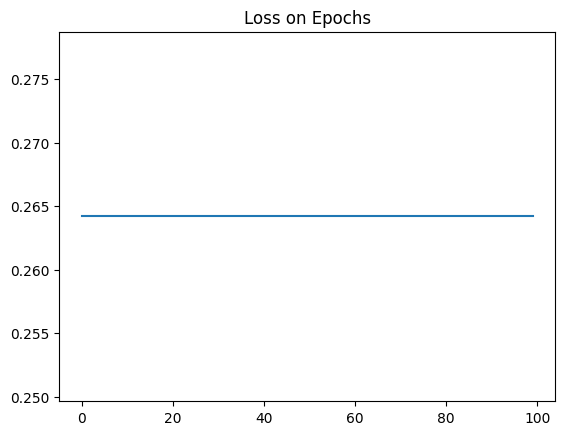

In [20]:
plt.title("Loss on Epochs")
plt.plot(losses)
plt.show()


## 3.1.3 모델 평가


In [21]:
# 데이터셋에 대한 간단한 추론 수행

# cpu 사용
device = torch.device('cpu')
slp.to(device)
# 모델을 평가 모드로 설정
slp.eval()
with torch.no_grad():
    for data in xor_dataset:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = slp(inputs)
        print(f"Input: {inputs}, Predicted: {outputs}, Ground Truth: {labels}")



Input: tensor([0., 0.]), Predicted: tensor([0.3396]), Ground Truth: tensor([0.])
Input: tensor([0., 1.]), Predicted: tensor([0.4756]), Ground Truth: tensor([1.])
Input: tensor([1., 0.]), Predicted: tensor([0.3252]), Ground Truth: tensor([1.])
Input: tensor([1., 1.]), Predicted: tensor([0.4595]), Ground Truth: tensor([0.])


# 3.2 Multi Layer Model


In [22]:
# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        #out = self.sigmoid(out)
        return out

# MLP 모델 인스턴스 생성
input_size = 2  # 입력 크기
hidden_size = 2  # 은닉층 크기
output_size = 1  # 출력 크기
mlp = MLP(input_size, hidden_size, output_size)


In [23]:
# Model Visualization
print(mlp)


MLP(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)


In [30]:
list(mlp.parameters())

[Parameter containing:
 tensor([[-0.1785,  0.3430],
         [-0.0109, -0.2301]], requires_grad=True),
 Parameter containing:
 tensor([0.0554, 0.6984], requires_grad=True),
 Parameter containing:
 tensor([[0.3205, 0.2779]], requires_grad=True),
 Parameter containing:
 tensor([0.3868], requires_grad=True)]

# 3.2.1 모델 학습

In [33]:

# CUDA 사용 가능 여부 확인 및 장치 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
# 데이터 로더 정의
train_loader = DataLoader(xor_dataset, batch_size=4, shuffle=False)

# 손실 함수와 옵티마이저 정의
criterion = torch.nn.MSELoss().to(device)
optimizer = optim.Adam(mlp.parameters(), lr=0.01)  # Adam 옵티마이저 사용

# 모델 초기화
mlp = MLP(2, 2, 1)  # input_size, hidden_size, output_size

# 모델을 CUDA로 이동
mlp.to(device)

# 손실 저장을 위한 리스트 초기화
mlp_losses = []

# 학습 루프 정의
num_epochs = 200  # 에포크 수 증가
from tqdm.notebook import tqdm

for epoch in tqdm(range(num_epochs), desc="Epoch"):
    # print(f"Epoch {epoch+1}/{num_epochs}")
    for batch in train_loader:
        # 입력과 레이블을 CUDA로 이동
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)

        # 모델 예측값 계산
        outputs = mlp(inputs)
        # 손실 계산
        loss = criterion(outputs, labels)
        # 옵티마이저 초기화
        optimizer.zero_grad()
        # 역전파 수행
        loss.backward()
        # 가중치 업데이트
        optimizer.step()

        # 손실 정보 표시
        # print(f"Batch Loss: {loss.item()}")

    # 에포크마다 손실 저장
    mlp_losses.append(loss.item())

Using device: cuda


Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

# 3.2.2 Visualization Loss


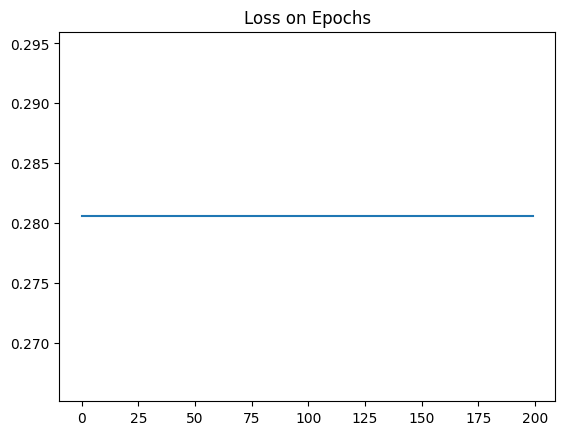

In [34]:
plt.title("Loss on Epochs")
plt.plot(mlp_losses)
plt.show()



# 3.2.3 모델 평가

In [27]:
# 데이터셋에 대한 간단한 추론 수행

# cpu 사용
device = torch.device('cpu')
mlp.to(device)
# 모델을 평가 모드로 설정
with torch.no_grad():
    for data in xor_dataset:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = mlp(inputs)
        print(f"Input: {inputs}, Predicted: {outputs}, Ground Truth: {labels}")


Input: tensor([0., 0.]), Predicted: tensor([0.6763]), Ground Truth: tensor([0.])
Input: tensor([0., 1.]), Predicted: tensor([0.6791]), Ground Truth: tensor([1.])
Input: tensor([1., 0.]), Predicted: tensor([0.6731]), Ground Truth: tensor([1.])
Input: tensor([1., 1.]), Predicted: tensor([0.6758]), Ground Truth: tensor([0.])


# 왜 학습이 안될까?


sigmoid 함수의 출력이 정확히 0 또는 1이 되려면 입력 값이 무한대 또는 음의 무한대가 되어야 함.




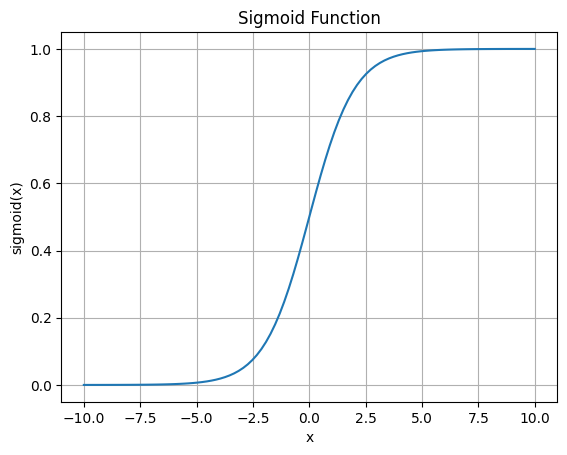

In [35]:
# sigmoid 함수 시각화

# 포함: numpy, matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

# sigmoid 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# or pytorch sigmoid
# import torch
# torch.sigmoid

# x 값 생성
x = np.linspace(-10, 10, 100)

# y 값 계산
y = sigmoid(x)

# 시각화
plt.plot(x, y)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid(True)
plt.show()


# 3.3 model with ReLU

ReLU 함수는 다음과 같은 수식으로 정의됨:

$$ReLU(x) = max(0, x)$$

이 수식은 입력 값이 0보다 작으면 0을 출력하고, 0보다 크거나 같으면 입력 값을 그대로 출력함.


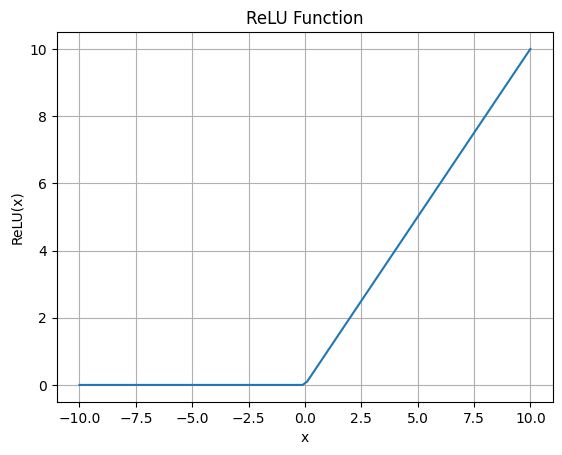

In [36]:
# ReLU 함수 시각화

# 포함: numpy, matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

# ReLU 함수 정의
def relu(x):
    return np.maximum(0, x)

# x 값 생성
x = np.linspace(-10, 10, 100)

# y 값 계산
y = relu(x)

# 시각화
plt.plot(x, y)
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.show()


3.3.1 SLP with ReLU

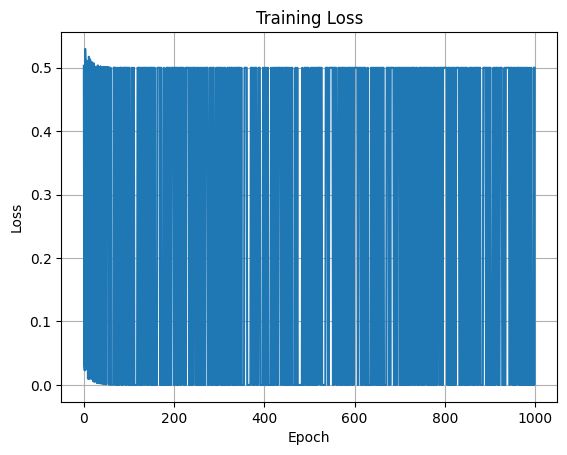

Input: [0. 0.], Predicted: [0.], Actual: [0.]
Input: [0. 1.], Predicted: [1.], Actual: [1.]
Input: [1. 0.], Predicted: [0.], Actual: [1.]
Input: [1. 1.], Predicted: [0.], Actual: [0.]


In [37]:
# SLP with ReLU 학습 및 시각화, 추론

# 포함: torch, torch.nn, torch.optim, matplotlib.pyplot
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# SLP 모델 정의
class SLP(nn.Module):
    def __init__(self):
        super(SLP, self).__init__()
        self.fc = nn.Linear(2, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc(x)
        x = self.relu(x)
        return x

# 모델, 손실 함수, 옵티마이저 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SLP().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# 학습
epochs = 1000
losses = []

# xor_dataloader 사용
for epoch in range(epochs):
    for xor_data, xor_labels in xor_dataloader:
        xor_data, xor_labels = xor_data.to(device), xor_labels.to(device)
        optimizer.zero_grad()
        outputs = model(xor_data)
        loss = criterion(outputs, xor_labels)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())

# 손실 시각화
plt.plot(range(len(losses)), losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# 추론
model.eval()
model.to("cpu")
with torch.no_grad():
    for data in xor_dataset:
        inputs, labels = data
        inputs, labels = inputs, labels
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        print(f"Input: {inputs.numpy()}, Predicted: {predicted.numpy()}, Actual: {labels.numpy()}")


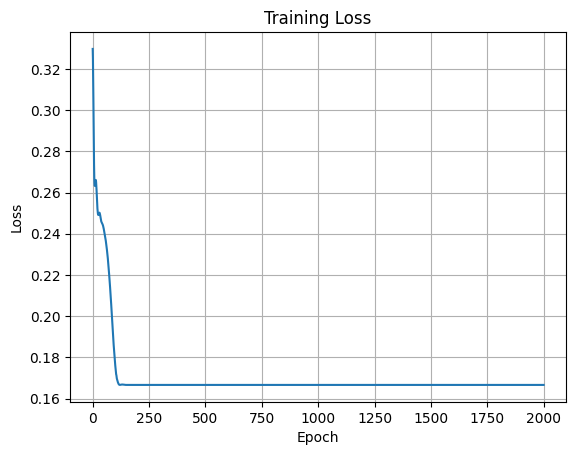

Input: [0. 0.], Output: [0.33333337], Predicted: [0.], Actual: [0.]
Input: [0. 1.], Output: [1.], Predicted: [1.], Actual: [1.]
Input: [1. 0.], Output: [0.33333337], Predicted: [0.], Actual: [1.]
Input: [1. 1.], Output: [0.33333337], Predicted: [0.], Actual: [0.]


In [40]:
# MLP with ReLU 학습 및 시각화, 추론

# 포함: torch, torch.nn, torch.optim, matplotlib.pyplot
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# MLP 모델 정의
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # 첫 번째 레이어
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(2, 1)  # 두 번째 레이어

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 모델, 손실 함수, 옵티마이저 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.02,momentum=0.9)

# 학습
epochs = 2000
losses = []
xor_dataloader = DataLoader(xor_dataset, batch_size=4, shuffle=False)


# xor_dataloader 사용
for epoch in range(epochs):
    for batch in xor_dataloader:
        x, y = batch
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
    losses.append(loss.item())

# 손실 시각화
plt.plot(range(len(losses)), losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# 추론
model.eval()
model.to("cpu")
with torch.no_grad():
    for data in xor_dataset:
        inputs, labels = data
        inputs, labels = inputs, labels
        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        print(f"Input: {inputs.numpy()}, Output: {outputs.numpy()}, Predicted: {predicted.numpy()}, Actual: {labels.numpy()}")
